![insomnia](insomnia.jpg)


Your client, SleepInc, has shared anonymized sleep data from their hot new sleep tracking app SleepScope. As their data science consultant, your mission is to analyze the lifestyle survey data with Python to discover relationships between exercise, gender, occupation, and sleep quality. See if you can identify patterns leading to insights on sleep quality.

## 💾 The data: sleep_health_data.csv

SleepInc has provided you with an anonymized dataset of sleep and lifestyle metrics for 374 individuals. This dataset contains average values for each person calculated over the past six months. The data is saved as `sleep_health_data.csv`.

The dataset includes 13 columns covering sleep duration, quality, disorders, exercise, stress, diet, demographics, and other factors related to sleep health. 

| Column | Description |
|---------|----------------------------------------|  
| `Person ID` | An identifier for each individual. |
| `Gender` | The gender of the person (Male/Female). |  
| `Age` | The age of the person in years. |
| `Occupation` | The occupation or profession of the person. |
| `Sleep Duration (hours)` | The average number of hours the person sleeps per day. |
| `Quality of Sleep (scale: 1-10)` | A subjective rating of the quality of sleep, ranging from 1 to 10. |
| `Physical Activity Level (minutes/day)` | The average number of minutes the person engages in physical activity daily. |  
| `Stress Level (scale: 1-10)` | A subjective rating of the stress level experienced by the person, ranging from 1 to 10. |
| `BMI Category` | The BMI category of the person (e.g., Underweight, Normal, Overweight). |
| `Blood Pressure (systolic/diastolic)` | The average blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure. |
| `Heart Rate (bpm)` | The average resting heart rate of the person in beats per minute. |
| `Daily Steps` | The average number of steps the person takes per day. |
| `Sleep Disorder` | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). |

In [2]:
import pandas as pd
pd.set_option("display.width", 1000)

sleep_df = pd.read_csv('sleep_health_data.csv')

print(sleep_df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  Quality of Sleep  Physical Activity Level  Stress Level BMI Category Blood Pressure  Heart Rate  Daily Steps Sleep Disorder
0          1   Male   27     Software Engineer             6.1                 6                       42             6   Overweight         126/83          77         4200            NaN
1          2   Male   28                Doctor             6.2                 6                       60             8       Normal         125/80          75        10000            NaN
2          3   Male   28                Doctor             6.2                 6                       60             8       Normal         125/80          75        10000            NaN
3          4   Male   28  Sales Representative             5.9                 4                       30             8        Obese         140/90          85         3000    Sleep Apnea
4          5   Male   28  Sales Representative             5

- Which occupation has the lowest average sleep duration? Save this in a string variable called `lowest_sleep_occ`.

In [3]:
sleep_duration = sleep_df.groupby('Occupation')['Sleep Duration'].mean()
lowest_sleep_occ = sleep_duration.sort_values().index[0]

print(lowest_sleep_occ)

Sales Representative


- Which occupation has the lowest average sleep quality? Save this in a string variable called `lowest_sleep_quality_occ`. 
    Did the occupation with the lowest sleep duration also have the lowest sleep quality? 
    If so assign a boolean value to variable `same_occ` variable, `True` if it is the same occupation, and `False` if it isn't.

In [4]:
sleep_quality = sleep_df.groupby('Occupation')['Quality of Sleep'].mean()  
lowest_sleep_quality_occ = sleep_quality.sort_values().index[0]

if lowest_sleep_occ == lowest_sleep_quality_occ:
  same_occ = True
else:
  same_occ = False
  
print(same_occ)

True


- Let's explore how `BMI Category` can affect sleep disorder rates. Start by finding what ratio of app users in each `BMI Category` have been diagnosed with Insomnia. Create a dictionary named: `bmi_insomnia_ratios`. The key should be the `BMI Category` as a string, while the value should be the ratio of people in this category with insomnia as a `float` rounded to two decimal places. Here is an example:
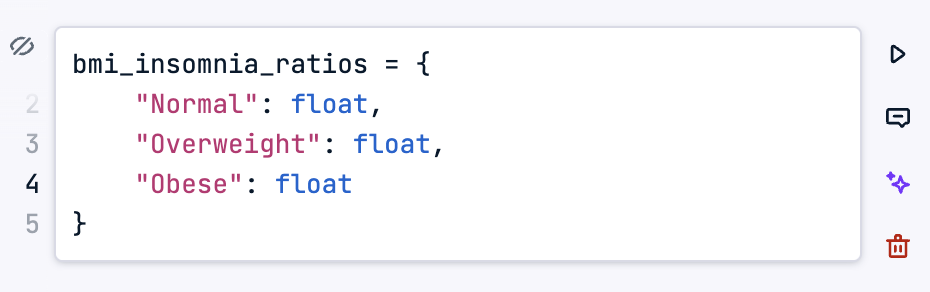
- Please note the keys are case-sensitive, and should be formatted as shown in the example dictionary.

In [5]:
normal = sleep_df[(sleep_df["BMI Category"] == "Normal") &   (sleep_df["Sleep Disorder"] == "Insomnia")]
normal2 = sleep_df[(sleep_df["BMI Category"] == "Normal Weight") &  (sleep_df["Sleep Disorder"] == "Insomnia")]

total_normal = len(sleep_df[sleep_df["BMI Category"] == "Normal"])  
normal_insomnia_ratio = round(len(normal) / total_normal, 2) 


# Overweight
overweight = sleep_df[(sleep_df["BMI Category"] == "Overweight") & (sleep_df["Sleep Disorder"] == "Insomnia")]  
total_overweight = len(sleep_df[sleep_df["BMI Category"] == "Overweight"])  
overweight_insomnia_ratio = round(len(overweight) / total_overweight, 2)

In [6]:
obese = sleep_df[(sleep_df["BMI Category"] == "Obese") & (sleep_df["Sleep Disorder"] == "Insomnia")]
total_obese = len(sleep_df[sleep_df["BMI Category"] == "Obese"])  

obese_insomnia_ratio = round(len(obese) / total_obese, 2)

bmi_insomnia_ratios = {
    "Normal": normal_insomnia_ratio,  
    "Overweight": overweight_insomnia_ratio,
    "Obese": obese_insomnia_ratio 
}

print(bmi_insomnia_ratios)

{'Normal': 0.04, 'Overweight': 0.43, 'Obese': 0.4}
